In [1]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import time


2.0.0-alpha0


In [2]:
data = np.load('circles_data.npz')
circleData = data["circles"]
distanceLabels = data['distlab']
radiiLabels = data['radiilab']
grid = 32
n_data = distanceLabels.size

Print a plot of data to see what it looks like!

radius = 
[26 22]
distance between centers = 
[6.]


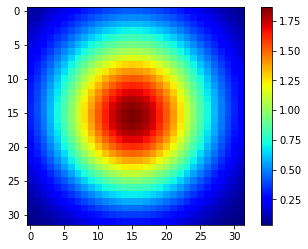

In [3]:
display = circleData[60].reshape(grid,grid)
plt.grid(False)
plt.imshow(display, cmap = 'jet')
print("radius = ")
print(radiiLabels[60])
print("distance between centers = ")
print(distanceLabels[60])
plt.colorbar()

Preprocessing -> spit data into training and testing; take 80% for training and 20% for testing.

If using CNN, uncomment ".reshape(n_data, grid, grid, 1)".

In [4]:
distanceData = circleData.reshape(n_data, grid, grid, 1)
split = int(0.8*len(circleData))
train_data = distanceData[:split]
train_labels = distanceLabels[:split]
print (train_data.shape)
test_data = distanceData[split:]
print(test_data.shape)
test_labels = distanceLabels[split:]

(800, 32, 32, 1)
(200, 32, 32, 1)


Build DNN:

In [5]:
def build_model():
  model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(), 
    layers.Dense(64, activation=tf.nn.relu), 
    layers.Dense(64, activation=tf.nn.relu), 
    layers.Dense(1)
  ])

  model.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['mean_squared_error', 'mean_absolute_error'])
  return model

Initialize model:

In [6]:
DistanceCNN = build_model()

Test model's prediction $before$ training:

In [7]:
example_batch = train_data[:10]
example_labels = train_labels[:10]
example_result = DistanceCNN.predict(example_batch)
results = DistanceCNN.evaluate(example_batch, example_labels)
example_result

10/10 [==============================] - 0s 7ms/sample - loss: 118.7697 - mean_squared_error: 118.7697 - mean_absolute_error: 10.0280


array([[-0.02507427],
       [-0.02339419],
       [-0.0262432 ],
       [-0.03389679],
       [-0.03425153],
       [-0.0280572 ],
       [-0.02240143],
       [-0.02946915],
       [-0.02702104],
       [-0.03031375]], dtype=float32)

Now train! (warning: if building CNN, computer tends to get loud)

In [8]:
 class PrintDot(keras.callbacks.Callback):
   def on_epoch_end(self, epoch, logs):
     if epoch % 100 == 0: 
         print('')
     print('.', end='')
    
 EPOCHS = 100

 history = DistanceCNN.fit(
   train_data, train_labels,
   epochs=EPOCHS, validation_split = 0.2, verbose = 0,
   callbacks=[PrintDot()])


....................................................................................................

Now make a plot that shows the pregression of accuracy through each training epoch.

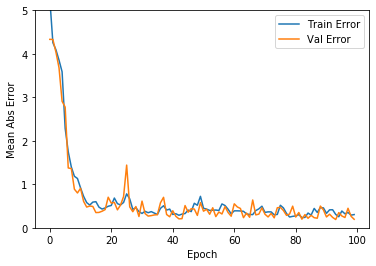

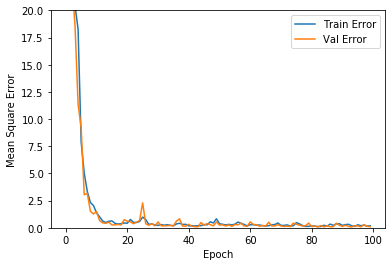

In [9]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

Now have the model train with "early stopping". the tensorflow "early stopping" function has the training stop according to a monitor. In our case, we are stopping it when the monitor sees an insufficient change in variable loss within the last ten epochs.

In [10]:
# model_circ = build_model()
# EPOCHS = 1000
# #The patience parameter is the amount of epochs to check for improvement
# #early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# #history_earlyStop = model_circ.fit(train_data, train_labels, epochs=EPOCHS,
#                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])
# #plot_history(history_earlyStop)

Evaluate the performance of our DNN! Plot predictions vs. true values (the line is predictions vs. predicitons).

Multilayer perceptron: initial MSE ~ 656.7611; final MSE ~ 0.8408.

CNN: initial MSE ~ 1170.2961; final MSE ~ 1.6238.

CNN w/ MaxPooling layer: initial MSE ~ 1167.0415; final ~ MSE 0.4101.

CNN w/ AveragePooling layer: initial MSE ~ 804.62; final ~ 0.78.

200/200 [==============================] - 0s 253us/sample - loss: 0.1015 - mean_squared_error: 0.1015 - mean_absolute_error: 0.1952


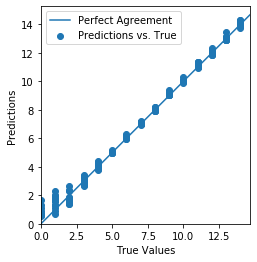

In [11]:
test_predictions = DistanceCNN.predict(test_data)
results = DistanceCNN.evaluate(test_data, test_labels)
plt.scatter(test_labels.flatten(), test_predictions.flatten(), label = 'Predictions vs. True')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100], label="Perfect Agreement")
plt.legend(loc='upper left')

Now let's use the same network to predict radii!

To use CNN, uncomment ".reshape(n_data, grid, grid, 1)"

In [12]:
radData = circleData.reshape(n_data, grid, grid, 1)
split = int(0.8*len(radData))
train_data_rad = radData[:split]
print(train_data_rad.shape)
train_labels_rad = radiiLabels[:split]
test_data_rad = radData[split:]
test_labels_rad = radiiLabels[split:]

(800, 32, 32, 1)


To implement basic CNN, uncomment "layers.Conv2D(32, (3, 3), activation='relu'), layers.Conv2D(64, (3, 3)," and "layers.Flatten()"

To implement MaxPooling CNN, uncomment "layers.Conv2D(32, (3, 3), activation='relu'), layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2))," and "layers.Flatten()"


In [13]:
def build_model_rad():
  model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(2)
  ])

  model.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error', 'accuracy'])
  return model

In [14]:
RadiiCNN = build_model_rad()
example_batch = train_data_rad[:10]
example_labels = train_labels_rad[:10]
example_result = RadiiCNN.predict(example_batch)
results = RadiiCNN.evaluate(example_batch, example_labels)
example_result

10/10 [==============================] - 0s 6ms/sample - loss: 515.3474 - mean_absolute_error: 22.3470 - mean_squared_error: 515.3474 - accuracy: 0.3000


array([[ 0.01576561, -0.00485861],
       [ 0.01059191, -0.00950189],
       [ 0.01145563, -0.00817952],
       [ 0.00920083, -0.0070691 ],
       [ 0.00828054, -0.00760864],
       [ 0.01759785, -0.00318999],
       [ 0.0147551 , -0.00526139],
       [ 0.01726241, -0.00428578],
       [ 0.01131818, -0.00756295],
       [ 0.00939904, -0.00862257]], dtype=float32)

For more information while the network is running, such as real time validation error, set "verbose = 1".


....................................................................................................Training time = 
105.04370188713074


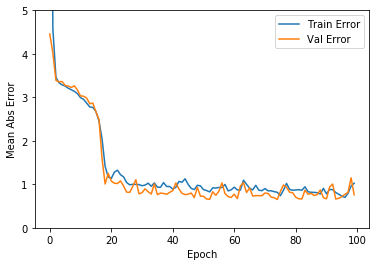

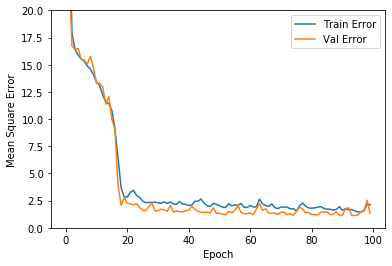

In [15]:
EPOCHS = 100
toc = time.time()
history = RadiiCNN.fit(
  train_data_rad, train_labels_rad,
  epochs=EPOCHS, validation_split = 0.2, verbose = 0,
  callbacks=[PrintDot()])
tic = time.time()
print('Training time = ')
print(tic-toc)
plot_history(history)

For epochs = 1000, the above plot is a good example of how the error on the validation data can actually increase after a certain epoch-value is reached.

In [16]:
# model_rad = build_model_rad()
# EPOCHS = 1000
# # The patience parameter is the amount of epochs to check for improvement
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# toc = time.clock()

# history = model_rad.fit(train_data_rad, train_labels_rad, epochs=EPOCHS,
#                     validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])
# tic = time.clock()

# print('Training time = ')
# print(tic-toc)
# plot_history(history)

In [17]:
results = RadiiCNN.evaluate(test_data_rad, test_labels_rad)
print(results)

200/200 [==============================] - 0s 280us/sample - loss: 1.2352 - mean_absolute_error: 0.7535 - mean_squared_error: 1.2352 - accuracy: 0.9150
[1.2352136015892028, 0.7535048, 1.2352136, 0.915]


Multilayer perceptron: final accuracy ~ 93%; initial MSE ~ 1019.7198 ; final MSE ~ 7.7464.

CNN: final accuracy ~ 96%; intitial MSE ~ 797.3132; final MSE ~ 4.2162.

CNN w/ MaxPooling layer: final accuracy ~ 97%; initial MSE ~ 800.8616; final MSE ~ 3.8766.

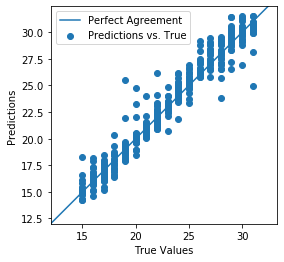

In [18]:
test_predictions_rad = RadiiCNN.predict(test_data_rad)
test_labels_plot = test_labels_rad.flatten()
plt.scatter(test_labels_plot, test_predictions_rad.flatten(), label='Predictions vs. True')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([12,plt.xlim()[1]])
plt.ylim([12,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100], label="Perfect Agreement")
plt.legend(loc='upper left')